In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
# 1. Carrega os dados
df = pd.read_csv('data.csv')

# 2. Define features e alvo
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
df['target'] = (df['popularity'] > 70).astype(int)

# 3. Remove linhas com dados em falta
df_clean = df.dropna(subset=features + ['target'])

X = df_clean[features].values
y = df_clean['target'].values

# 4. Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression

# Modelo de regressão logística
clf = LogisticRegression(class_weight='balanced', max_iter=1000)
clf.fit(X_train, y_train)

# Coeficientes
for feature, coef in zip(features, clf.coef_[0]):
    print(f"{feature}: {coef:.4f}")


danceability: 0.7279
energy: -0.4523
loudness: 1.5343
speechiness: -0.0526
acousticness: -0.4198
instrumentalness: -0.5220
liveness: -0.1644
valence: -0.6774
tempo: 0.0675


In [4]:
# Cria features combinadas que refletem as relações lineares
df_clean['dance_loud'] = df_clean['danceability'] * df_clean['loudness']
df_clean['acoustic_valence'] = df_clean['acousticness'] * df_clean['valence']

features_final = ['danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence',
                   'tempo', 'dance_loud', 'acoustic_valence']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_clean[features_final].values
y = df_clean['target'].values

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treino/teste split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# 7. Modelo Random Forest com class_weight ajustado
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    random_state=42,
    class_weight={0: 1, 1: 10}  # Aumenta o peso da classe 1
)
clf.fit(X_train, y_train)

# 8. Avaliação padrão (threshold = 0.5)
print("Avaliação padrão (threshold=0.5):")
y_pred_default = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# 9. Ajuste de threshold
y_probs = clf.predict_proba(X_test)[:, 1]
threshold = 0.3  # Podes ajustar este valor para 0.4, 0.3, etc.
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("\nAvaliação com threshold ajustado (0.3):")
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

y_probs = clf.predict_proba(X_test)[:, 1]
threshold = 0.2  # Podes ajustar este valor para 0.4, 0.3, etc.
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("\nAvaliação com threshold ajustado (0.2):")
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

y_probs = clf.predict_proba(X_test)[:, 1]
threshold = 0.15  # Podes ajustar este valor para 0.4, 0.3, etc.
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("\nAvaliação com threshold ajustado (0.1):")
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

# 10. Importância das features
importances = clf.feature_importances_
print("\nImportância das features:")
for f, imp in zip(features_final, importances):
    print(f"{f}: {imp:.4f}")


Avaliação padrão (threshold=0.5):
[[33197   116]
 [  764    54]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33313
           1       0.32      0.07      0.11       818

    accuracy                           0.97     34131
   macro avg       0.65      0.53      0.55     34131
weighted avg       0.96      0.97      0.97     34131


Avaliação com threshold ajustado (0.3):
[[32876   437]
 [  679   139]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     33313
           1       0.24      0.17      0.20       818

    accuracy                           0.97     34131
   macro avg       0.61      0.58      0.59     34131
weighted avg       0.96      0.97      0.96     34131


Avaliação com threshold ajustado (0.2):
[[32394   919]
 [  585   233]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     33313
           1       0.20     

## Vamos usar SMOTE

Distribuição das classes após SMOTE: 
 0    133075
1    133075
Name: count, dtype: int64

Avaliação padrão (threshold=0.5):
[[30967  2346]
 [  451   367]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     33313
           1       0.14      0.45      0.21       818

    accuracy                           0.92     34131
   macro avg       0.56      0.69      0.58     34131
weighted avg       0.97      0.92      0.94     34131


Avaliação com threshold ajustado (0.3):
[[28810  4503]
 [  293   525]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     33313
           1       0.10      0.64      0.18       818

    accuracy                           0.86     34131
   macro avg       0.55      0.75      0.55     34131
weighted avg       0.97      0.86      0.91     34131



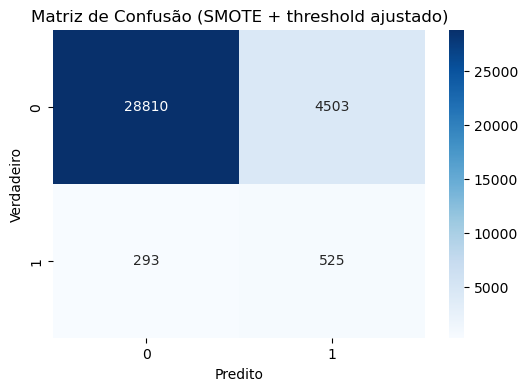

In [12]:
from imblearn.over_sampling import SMOTE

# 7. Aplica SMOTE apenas no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribuição das classes após SMOTE: \n", pd.Series(y_train_res).value_counts())

# 8. Treina o modelo Random Forest com dados balanceados
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    random_state=42
)
clf.fit(X_train_res, y_train_res)

# 9. Avaliação padrão (threshold = 0.5)
print("\nAvaliação padrão (threshold=0.5):")
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 10. Ajuste de threshold para mais hits
y_probs = clf.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

print("\nAvaliação com threshold ajustado (0.3):")
print(confusion_matrix(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))

# 11. Visualiza matriz de confusão (opcional)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (SMOTE + threshold ajustado)')
plt.show()

## Vamos ajustar thresholds

In [18]:
# 7. Aplica SMOTE no treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 8. Modelo Random Forest
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    random_state=42
)
clf.fit(X_train_res, y_train_res)

# 9. Previsões de probabilidade
y_probs = clf.predict_proba(X_test)[:, 1]

# 10. Loop de thresholds com barra de progresso
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

print("\nAjustando thresholds com barra de progresso:")
for threshold in tqdm(thresholds, desc="Testando thresholds"):
    y_pred_adjusted = (y_probs >= threshold).astype(int)
    
    # Calcula métricas
    report = classification_report(y_test, y_pred_adjusted, output_dict=True)
    f1_hit = report['1']['f1-score']
    recall_hit = report['1']['recall']
    precision_hit = report['1']['precision']
    accuracy = report['accuracy']
    
    results.append({
        'Threshold': threshold,
        'F1-hit': f1_hit,
        'Recall-hit': recall_hit,
        'Precision-hit': precision_hit,
        'Accuracy': accuracy
    })


Ajustando thresholds com barra de progresso:


Testando thresholds: 100%|██████████| 9/9 [00:00<00:00, 226.21it/s]



Resultados dos thresholds:
   Threshold    F1-hit  Recall-hit  Precision-hit  Accuracy
0        0.1  0.114067    0.854523       0.061112  0.681873
1        0.2  0.151617    0.742054       0.084435  0.800973
2        0.3  0.179610    0.641809       0.104415  0.859483
3        0.4  0.199117    0.551345       0.121498  0.893704
4        0.5  0.207873    0.448655       0.135275  0.918051
5        0.6  0.217591    0.376528       0.153005  0.935103
6        0.7  0.226898    0.303178       0.181287  0.950485
7        0.8  0.217178    0.216381       0.217980  0.962615
8        0.9  0.127389    0.085575       0.249110  0.971902


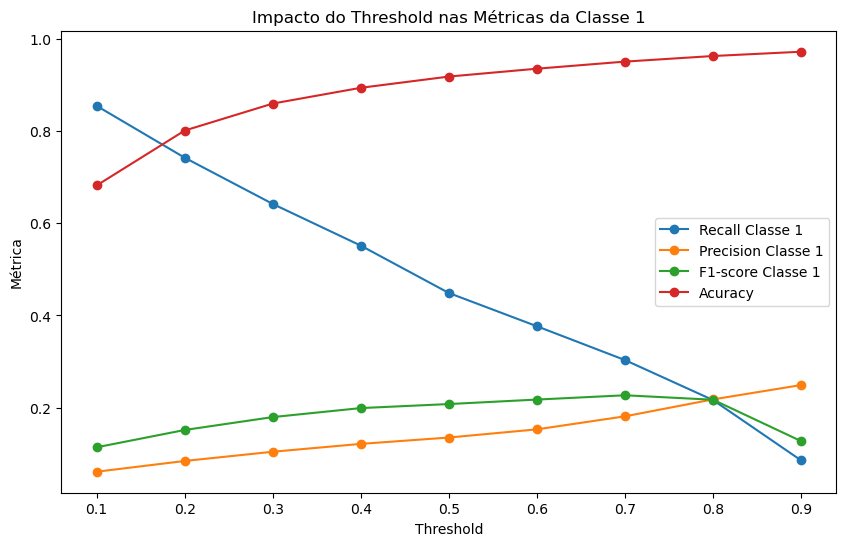

In [20]:
# 11. Mostra resultados em tabela
df_results = pd.DataFrame(results)
print("\nResultados dos thresholds:")
print(df_results)

# 12. Visualiza evolução do recall e f1-score
plt.figure(figsize=(10, 6))
plt.plot(df_results['Threshold'], df_results['Recall-hit'], marker='o', label='Recall Classe 1')
plt.plot(df_results['Threshold'], df_results['Precision-hit'], marker='o', label='Precision Classe 1')
plt.plot(df_results['Threshold'], df_results['F1-hit'], marker='o', label='F1-score Classe 1')
plt.plot(df_results['Threshold'], df_results['Accuracy'], marker='o', label='Acuracy')
plt.xlabel('Threshold')
plt.ylabel('Métrica')
plt.title('Impacto do Threshold nas Métricas da Classe 1')
plt.legend()
plt.show()